In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dữ liệu Lịch sử VNM 2013_2023.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ngày        2505 non-null   object
 1   Đóng cửa    2505 non-null   object
 2   Mở cửa      2505 non-null   object
 3   Cao nhất    2505 non-null   object
 4   Thấp nhất   2505 non-null   object
 5   KL          2505 non-null   object
 6   % Thay đổi  2505 non-null   object
dtypes: object(7)
memory usage: 137.1+ KB


In [4]:
df

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất,KL,% Thay đổi
0,21/07/2023,"73,500.0","72,500.0","75,000.0","72,400.0",3.12M,1.10%
1,20/07/2023,"72,700.0","72,600.0","72,900.0","72,300.0",2.45M,0.14%
2,19/07/2023,"72,600.0","72,500.0","73,000.0","72,400.0",2.95M,0.28%
3,18/07/2023,"72,400.0","72,500.0","72,600.0","72,200.0",2.93M,0.14%
4,17/07/2023,"72,300.0","73,000.0","73,600.0","72,200.0",3.92M,-1.36%
...,...,...,...,...,...,...,...
2500,16/07/2013,"96,528.0","95,139.0","97,222.0","95,139.0",729.69K,1.46%
2501,15/07/2013,"95,139.0","95,139.0","95,833.0","94,444.0",176.98K,0.00%
2502,12/07/2013,"95,139.0","94,444.0","95,139.0","93,750.0",220.82K,0.74%
2503,11/07/2013,"94,444.0","94,444.0","95,139.0","93,750.0",161.84K,0.00%


In [5]:
df.drop(columns=['KL', '% Thay đổi'], axis=1, inplace=True)

In [6]:
df

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,21/07/2023,"73,500.0","72,500.0","75,000.0","72,400.0"
1,20/07/2023,"72,700.0","72,600.0","72,900.0","72,300.0"
2,19/07/2023,"72,600.0","72,500.0","73,000.0","72,400.0"
3,18/07/2023,"72,400.0","72,500.0","72,600.0","72,200.0"
4,17/07/2023,"72,300.0","73,000.0","73,600.0","72,200.0"
...,...,...,...,...,...
2500,16/07/2013,"96,528.0","95,139.0","97,222.0","95,139.0"
2501,15/07/2013,"95,139.0","95,139.0","95,833.0","94,444.0"
2502,12/07/2013,"95,139.0","94,444.0","95,139.0","93,750.0"
2503,11/07/2013,"94,444.0","94,444.0","95,139.0","93,750.0"


In [7]:
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [8]:
df

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
1,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
2,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
3,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"
4,2023-07-17,"72,300.0","73,000.0","73,600.0","72,200.0"
...,...,...,...,...,...
2500,2013-07-16,"96,528.0","95,139.0","97,222.0","95,139.0"
2501,2013-07-15,"95,139.0","95,139.0","95,833.0","94,444.0"
2502,2013-07-12,"95,139.0","94,444.0","95,139.0","93,750.0"
2503,2013-07-11,"94,444.0","94,444.0","95,139.0","93,750.0"


In [9]:
df.describe()

,Ngày
count,2505
mean,2018-07-17 16:17:14.730539008
min,2013-07-10 00:00:00
25%,2016-01-13 00:00:00
50%,2018-07-19 00:00:00
75%,2021-01-14 00:00:00
max,2023-07-21 00:00:00


In [10]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

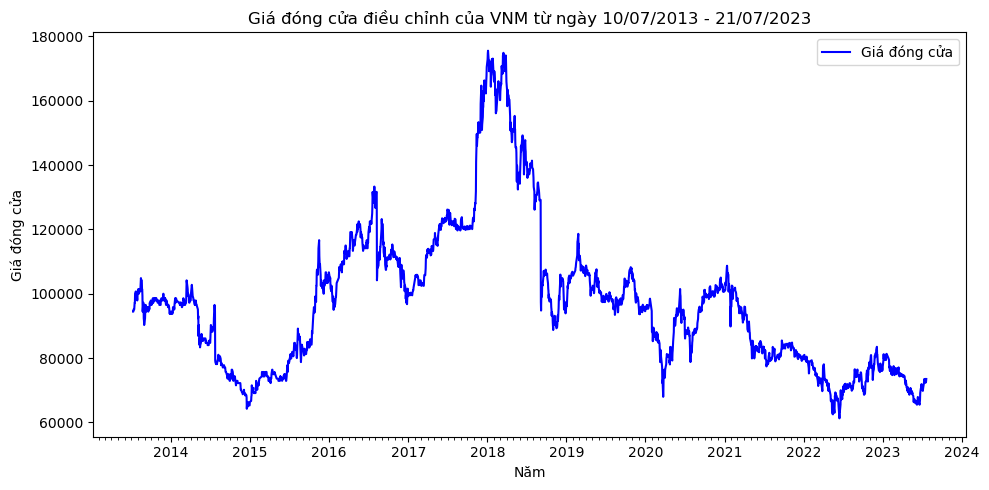

In [11]:
# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='blue')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Giá đóng cửa điều chỉnh của VNM từ ngày 10/07/2013 - 21/07/2023')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [12]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2023-07-17,72300.0
2023-07-18,72400.0
2023-07-19,72600.0


In [13]:
data = df1.values    
print(data.shape)
data

(2505, 1)


array([[94444.],
       [94444.],
       [95139.],
       ...,
       [72600.],
       [72700.],
       [73500.]])

In [14]:
train_data = data[:1800]
test_data = data[1800:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [16]:
sc_train

array([[0.29027738],
       [0.29027738],
       [0.29635691],
       ...,
       [0.09919619],
       [0.10007094],
       [0.10706897]])

In [17]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [18]:
x_train

[array([0.29027738, 0.29027738, 0.29635691, 0.29635691, 0.30850724,
        0.31457803, 0.31457803, 0.33887869, 0.34494948, 0.34494948,
        0.32672836, 0.33279915, 0.33887869, 0.32065757, 0.32672836,
        0.34494948, 0.34494948, 0.35102902, 0.33887869, 0.35102902,
        0.34494948, 0.34494948, 0.34494948, 0.34494948, 0.35709981,
        0.36925013, 0.38140046, 0.37532967, 0.37532967, 0.35102902,
        0.35102902, 0.33279915, 0.29027738, 0.31457803, 0.30850724,
        0.27205626, 0.26598547, 0.25383514, 0.27205626, 0.29027738,
        0.30850724, 0.30850724, 0.29027738, 0.3024277 , 0.3024277 ,
        0.29635691, 0.3024277 , 0.29635691, 0.29635691, 0.29027738]),
 array([0.29027738, 0.29635691, 0.29635691, 0.30850724, 0.31457803,
        0.31457803, 0.33887869, 0.34494948, 0.34494948, 0.32672836,
        0.33279915, 0.33887869, 0.32065757, 0.32672836, 0.34494948,
        0.34494948, 0.35102902, 0.33887869, 0.35102902, 0.34494948,
        0.34494948, 0.34494948, 0.34494948, 0.

In [19]:
y_train

[0.2963569134842401,
 0.30242770379791795,
 0.2963569134842401,
 0.30242770379791795,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.32065756981190174,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.3267283601255797,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [21]:
x_train.shape, y_train.shape

((1750, 50), (1750,))

In [22]:
# x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
# y_train = np.reshape(y_train,(y_train.shape[0],1))

In [23]:
# x_train.shape, y_train.shape

In [24]:
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
print(x_test.shape)
y_test = test_data

(705, 50)


In [41]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model
from keras.losses import mean_absolute_error, mean_squared_error
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(loss = mean_squared_error, optimizer='adam')

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               26112     
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 157697 (616.00 KB)
Trainable params: 157697 (616.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(x_train, y_train, epochs=100, batch_size=256)

Epoch 1/100
7/7 [==============================] - 29s 94ms/step - loss: 0.1058
Epoch 2/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0255
Epoch 3/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0107
Epoch 4/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0056
Epoch 5/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0034
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0026
Epoch 7/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0018
Epoch 8/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0015
Epoch 9/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0013
Epoch 10/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0012
Epoch 11/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 12/100
7/7 [==============================] - 0s 61ms/step - loss: 0.0011
Epoch 13/100
7/7 [==============================

In [46]:
y_pred = model.predict(x_test)

23/23 [==============================] - 1s 12ms/step


In [47]:
y_predict = sc.inverse_transform(y_pred)

In [48]:
y_train = np.reshape(y_train,(y_train.shape[0],1))
y_train = sc.inverse_transform(y_train)

In [49]:
y_train_predict = model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

55/55 [==============================] - 0s 4ms/step


C:\Users\truon\AppData\Local\Temp\ipykernel_10144\3648909547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
C:\Users\truon\AppData\Local\Temp\ipykernel_10144\3648909547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_predict #thêm dữ liệu


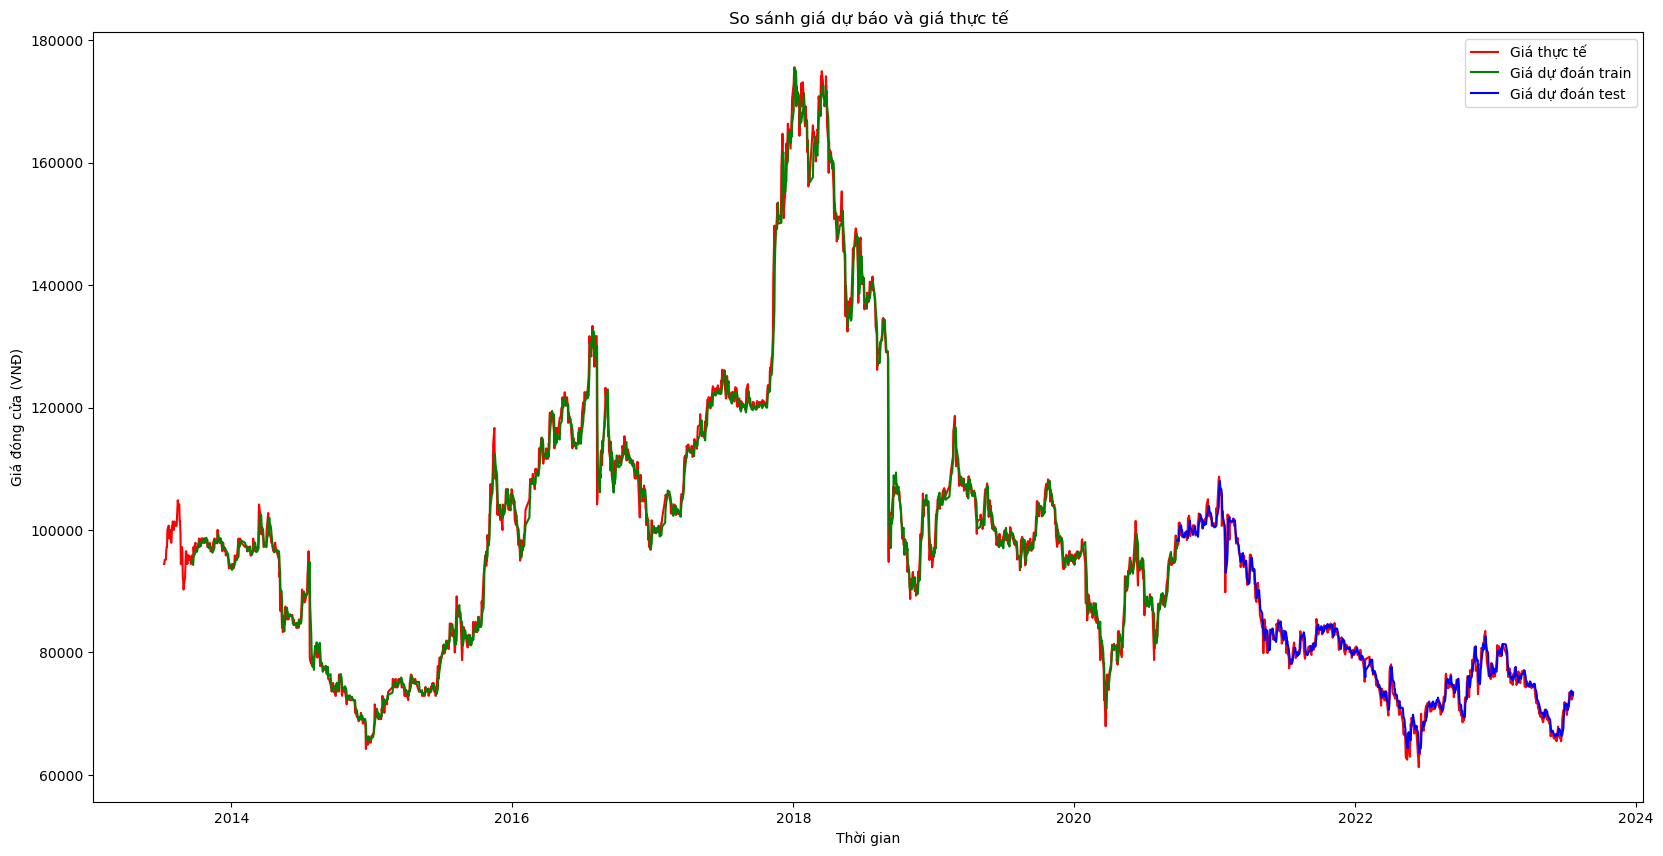

In [50]:
#lập biểu đồ so sánh
train_data1 = df1[50:1800]
test_data1 = df1[1800:]

plt.figure(figsize=(20,10))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [51]:
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error, mean_squared_error#đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error #đo % sai số tuyệt đối trung bình

#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train:',mean_squared_error(y_train,y_train_predict))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_squared_log_error(y_train,y_train_predict))

print('--------------------------------------------------------')
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test:',mean_squared_error(y_test,y_predict))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_squared_log_error(y_test,y_predict))

Độ phù hợp tập train: 0.990756855311576
Sai số tuyệt đối trung bình trên tập train: 4878577.860455086
Sai số tuyệt đối trung bình trên tập train (VNĐ): 1346.8247379464283
Phần trăm sai số tuyệt đối trung bình tập train: 0.00042202976460975635
--------------------------------------------------------
Độ phù hợp tập test: 0.9832735337171872
Sai số tuyệt đối trung bình trên tập test: 1912850.3692554582
Sai số tuyệt đối trung bình trên tập test (VNĐ): 1018.4764394946808
Phần trăm sai số tuyệt đối trung bình tập test: 0.00030075088069123274


1/1 [==============================] - 0s 107ms/step


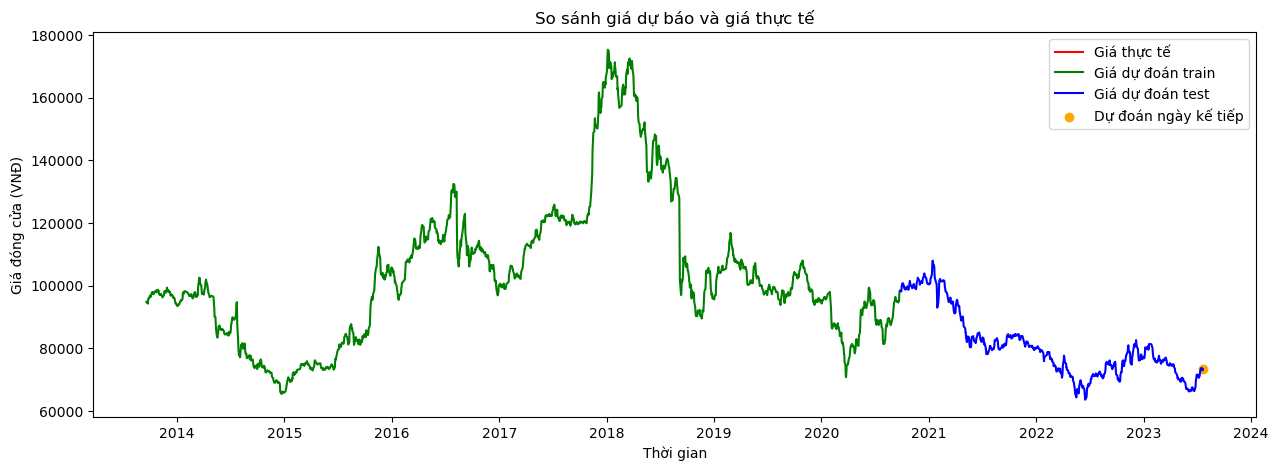

In [52]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
# x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()

In [53]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

        Ngày   Giá dự đoán  Giá ngày trước
0 2023-07-22  73520.367188         73500.0
